# PCA and LDA on Fischer Faces dataset

Performed PCA on to reduce the dimension from 10201 to K using PCA for high dimensional data and then performed LDA on it to one dimension.

Libraries used:
1) Numpy - for numerical computations such as eig(), matmul(), dot operator
2) Pillow - to read the .gif file
3) Matplotlib - to plot the graph

In [345]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### Function get_data() 

#### Input
Folder name - either train or test

#### Output
The image data of dimension 101 x 101 is returned as numpy array X of shape (Number of images in folder, Dimension of image)  
Labels - Happy (1) or Sad (2) - of the corresponding images

In [346]:
def get_data(folder):
    labels = [[], []]    

    for dirname, _, filenames in os.walk("Data/emotion_classification/"+ folder):
        i = 0
        for filename in filenames:   
            if "happy" in filename:
                labels[0].append(i)
            else:
                labels[1].append(i)
            i+=1

            gif = Image.open(os.path.join(dirname, filename))

            data = np.asarray(gif)

            x = data.reshape(1,101*101)

            if i == 1:
                X = x
            else:
                X = np.vstack((X, x))

    print("Input Data Shape", X.shape)
    print("Input Data", X)
    
    return X, labels

In [347]:
 X, labels = get_data('train')

Input Data Shape (20, 10201)
Input Data [[133 142 146 ...  95  95  95]
 [115 115 117 ... 220 227 213]
 [ 71  87 105 ...  65  66  71]
 ...
 [ 65  76  83 ...  57  53  54]
 [ 13  17  22 ... 255 255 255]
 [ 23  20  17 ... 121 215 255]]


### Function calculate_mean()

#### Input 
X - any numpy array

#### Output
Mean of the input data calculated along the column

In [348]:
def calculate_mean(X):
    mean = np.sum(X, axis=0)
    mean = mean / len(X)

    print("Mean of input", mean.shape, mean)
    
    return mean

In [349]:
mean = calculate_mean(X).reshape(10201,1)

Mean of input (10201,) [ 59.65  66.    70.85 ... 101.25 110.15 118.55]


#### Calculating the mean centered data

#### $ X_c = X - \mu $

In [350]:
X_centered = X - mean.T
print("Mean centered input", X_centered.shape, X_centered)

Mean centered input (20, 10201) [[ 73.35  76.    75.15 ...  -6.25 -15.15 -23.55]
 [ 55.35  49.    46.15 ... 118.75 116.85  94.45]
 [ 11.35  21.    34.15 ... -36.25 -44.15 -47.55]
 ...
 [  5.35  10.    12.15 ... -44.25 -57.15 -64.55]
 [-46.65 -49.   -48.85 ... 153.75 144.85 136.45]
 [-36.65 -46.   -53.85 ...  19.75 104.85 136.45]]


## Class PCA

## Function fit()

#### Input
X - Input data points

#### Performs

#### Eigen Analysis on $ \frac{1}{N}xx^T$ => Eigen vectors $\{v_1, ..., v_d \}$ and Eigen values $\{\lambda_1, ..., \lambda_d \}$

Sort the Eigen vectors based on the Magnitude of Eigen values in non-increasing order

#### Compute the original Eigen vector $ u_i = \frac{1}{\sqrt(\lambda_iN)}x^Tv_i $

Stores the original eigen vectors in it's class attributes

## Function transform()

#### Input
X - Input data points to project 

#### Computes projected data points $y_i = U^Tx_n$

## Function fit_transform()

Performs fit and transform on the same input data points


In [351]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.principal_components = None
        
    def fit(self, X):
        
        N = len(X)
        
        data = np.matmul(X, X.T) / len(X)
        #print("High Dimension", data)
        
        eigenValues, eigenVectors = np.linalg.eigh(data)
        
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        #print("Eigen values and vectors",eigenValues, eigenVectors.T)
        
        for i in range(self.num_components):
            u = (X.T.dot(eigenVectors.T[i])) / ((N*eigenValues[i])**(1/2))
            
            if i == 0:
                U = u
            else:
                U = np.vstack((U, u))
        print("Original Eigen vector", U.shape, U)
        
        self.principal_components = U
    
        return U
    
    def transform(self, X):
        U = self.principal_components
        P = U.dot(X.T)
        print("Projected Data", P.T.shape, P.T)
        return P
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
        

In [352]:
K = 17

pca = PCA(K)
U = pca.fit(X_centered)

Original Eigen vector (17, 10201) [[-0.00115826 -0.00150926 -0.00197879 ...  0.0008064   0.00046737
   0.0034823 ]
 [ 0.01789599  0.01738252  0.01712507 ...  0.01894991  0.01928142
   0.02171333]
 [-0.00217229 -0.00105655 -0.0005249  ... -0.03429417 -0.04331959
  -0.04319925]
 ...
 [-0.0068297  -0.00706774 -0.00711378 ... -0.01074867  0.00415079
  -0.003098  ]
 [ 0.01300381  0.01017989  0.00831078 ... -0.02271688 -0.01227954
  -0.01389118]
 [ 0.00746346  0.00434221  0.00113804 ...  0.00517495  0.01904807
   0.00527319]]


In [353]:
P = pca.transform(X_centered)

Projected Data (20, 17) [[-5.20109637e+03  1.51431966e+03  6.23638011e+01 -1.51882640e+03
   1.66374430e+02  1.33737649e+03  1.07596592e+03 -4.04672484e+02
   8.13433020e+02 -8.02790515e+02  7.52176834e+01  1.03121413e+02
   1.21980106e+01  1.16132971e+02 -1.28897232e+02 -7.96318550e+01
  -3.30602230e+00]
 [ 8.14204805e+02  1.70565189e+03 -8.52302420e+02  1.29608073e+03
  -1.25719754e+03  4.96465530e+02  1.31308478e+02 -1.02058734e+03
  -8.39940343e+01  6.04122813e+02 -9.00495815e+02  3.89639859e+02
  -3.60488461e+02  3.12079862e+02 -4.65078313e+01 -2.65482208e+02
  -1.78961971e+02]
 [ 2.11088887e+02  1.01264851e+03 -5.91784516e+01  4.65716231e+02
  -1.42073457e+03 -5.81803680e+02  4.46086309e+02  1.75461178e+02
  -2.19142673e+01  3.66943600e+01 -6.56542450e+02  3.01307908e+02
  -3.76932509e+02  2.85165928e+02 -1.36635755e+02  2.78620352e+02
  -2.01688967e+02]
 [-3.24018556e+03  9.95571304e+02 -3.69112829e+02 -4.57189235e+02
   7.90584663e+01 -1.36421608e+02 -1.54980039e+02  7.05972065

### Function get_labels()

Returns the label vector with each entry corresponding to the label of each image in data point

In [354]:
def get_labels(labels):
    y = []
    
    N = sum([len(i) for i in labels])
    for i in range(N):
        if i in labels[0]:
            y.append(1)
        else:
            y.append(2)

    print("Labels", y)
    return y

## Class LDA

### Function fit()

#### Inputs
X - Input data points
y - Corresponding labels

#### Calculates

### Mean for each class 
#### $ m_i = \frac{1}{N_1}\sum_{n \in c_1} x_n $, 
##### where, i = 1, 2

### Within-class Scatter Matrix
#### $ S_W = \frac{1}{N_1}\sum_{n \in c_1}(x_n - m_1)(x_n - m_1)^T + \frac{1}{N_2}\sum_{n \in c_2}(x_n - m_2)(x_n - m_2)^T $

### Between-class Scatter Matrix
#### $ S_B = (m_2 - m_1)(m_2 - m_1)^T$

### Performs Eigen analysis on $S_W^{-1}S_B$ => Eigen Vectors, Eigen Values

Sort the Eigen Vectors based on the magnitude of the corresponding Eigen Value in non-increasing order

### Linear Discriminant w = Eigen Vector corresponding to the largest Eigen Value

Stores the Linear Discriminant in it's class attribute

### Function transform()

Computes the project data points on the Linear Discriminant

#### $ y_n = w^Tx_n $

### Function fit_transform()

Performs both fit and transform on the same data points

In [355]:
class LDA:

    def __init__(self, num_components):
        self.num_components = num_components
        self.linear_discriminant = None

    def fit(self, X, y):
        classes = np.unique(y)

        Sw = np.zeros((K, K))
        Sb = np.zeros((K, K))
        
        for i in classes:
            X_c = X[labels[i-1]]
            
            mean_c = calculate_mean(X_c).reshape(1, K)
            
            if i == 1:
                mean1 = mean_c
                Sw += (np.matmul((X_c - mean_c).T, (X_c - mean_c)) / len(labels[0]))
            else:
                mean2 = mean_c
                Sw += (np.matmul((X_c - mean_c).T, (X_c - mean_c)) / len(labels[1]))
        
        mean_difference = (mean2 - mean1).reshape(K,1)
        
        Sb +=  (mean_difference).dot(mean_difference.T)

        S = np.linalg.inv(Sw).dot(Sb)

        eigenValues, eigenVectors = np.linalg.eig(S)
        
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        
        eigenVectors = eigenVectors.real
        self.linear_discriminant = eigenVectors.T[0]

    def transform(self, X):
        return np.dot(self.linear_discriminant, X.T)
    
    def fit_transform(self, X, y):
        fit(X, y)
        return transform(X)

##### Computes the Linear discriminant based on the projected data points from PCA

In [356]:
lda = LDA(1)

y = get_labels(labels)
lda.fit(P.T, y)

Labels [1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2]
Mean of input (17,) [ 197.35958317  638.95258043 -102.36206762 -144.99668997  226.54976984
  300.8188473   -98.18956449 -376.28692888   83.43507757   29.00773317
   12.15993823  218.53822016  206.82438227   13.6397201    -1.26810471
  -66.25425753  -65.47233866]
Mean of input (17,) [-161.4760226  -522.77938399   83.7507826   118.63365543 -185.35890259
 -246.12451143   80.3369164   307.87112363  -68.26506347  -23.73359986
   -9.94904037 -178.80399831 -169.21994913  -11.15977099    1.03754022
   54.20802889   53.56827709]


##### Projects and Plots the graph for the Training data

##### Optimal Threshold = 50

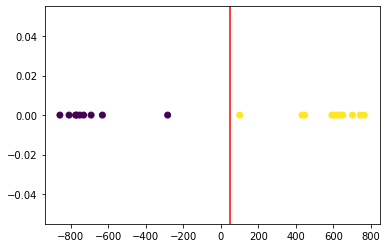

In [357]:
projected_data_train = lda.transform(P.T)

threshold = 50

N = [0 for i in range(20)]

plt.scatter(projected_data_train, N, c = y)
plt.axvline(x = threshold, color = 'r', linestyle = '-')
plt.show()

##### Takes in the Test image data as input

In [358]:
X_test, labels_test = get_data('test')
    
X_centered_test = X_test - mean.T

print(X_centered_test.shape)

Input Data Shape (10, 10201)
Input Data [[158 167 174 ... 118 117 118]
 [ 52  64  75 ...  60 136 224]
 [110 111 111 ...  74  73  78]
 ...
 [ 10  16  22 ...  62  64  62]
 [ 58  91 111 ...  43  50  57]
 [123 123 123 ...  65  78  96]]
(10, 10201)


##### PCA projects the Test data to K-Dimensional vector

In [359]:
P = pca.transform(X_centered_test)

Projected Data (10, 17) [[-6.11646003e+03  4.15348601e+02  1.37984460e+03 -1.50911418e+03
  -7.33012250e+02  7.58874543e+02  6.72982579e+02  1.20670495e+03
  -3.08113332e+02 -9.66503189e+01  3.85659617e+02 -2.12342668e+01
   8.35006003e+01  2.09663103e+01 -1.45486402e+02  3.77000199e+02
   2.15944859e+02]
 [-2.31293336e+03  5.65974666e+02 -1.17094512e+03  8.28735882e+01
   4.23834105e+02  3.63070986e+02  2.36048002e+02 -1.39570353e+02
  -1.06779515e+03  1.01750324e+03  6.38499951e+02 -3.90595803e+02
  -2.62621686e+02 -4.47074804e+01 -6.88393563e+01 -7.07527695e+02
  -1.83501348e+02]
 [ 3.57505753e+02  1.59575308e+01 -4.53174227e+01  6.63898629e+02
  -2.86591884e+01 -4.15606665e+01  3.94353854e+02 -9.48209175e+02
   1.60169479e+02 -2.45066020e+02  1.18295669e+02  3.67004125e+02
   5.77181380e+01 -1.85105407e+02 -2.87989558e+02  6.60112890e+02
   1.43943623e+01]
 [ 8.42262134e+02 -7.60674614e+02 -7.28990760e+02 -8.14528639e+02
   7.39489188e+01  4.32439794e+02 -2.65807445e+02  1.77796302

##### The K-Dimesnional data points from PCA are projected onto a 1-Dimensional vector using LDA

In [360]:
projected_data = lda.transform(P.T)

##### Projected data points are plotted

##### Classification accuracy = 100%

Labels [2, 1, 1, 1, 2, 1, 1, 2, 1, 2]


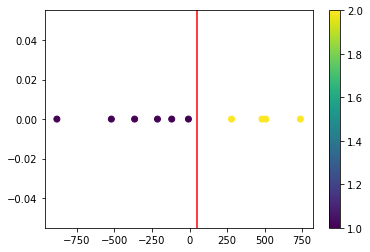

In [361]:
N = [0 for nn in range(10)]

y = get_labels(labels_test)

plt.scatter(projected_data, N, c = y)
plt.axvline(x = threshold, color = 'r', linestyle = '-')
plt.colorbar()
plt.show()

##### Separability is computed on the projected data

##### Separability for K = 17 is 1.196676

In [362]:
projected_data = projected_data.T

mean1 = calculate_mean(projected_data[labels_test[0]])
mean2 = calculate_mean(projected_data[labels_test[1]])

s1 = (projected_data[labels_test[0]] - mean1).T.dot((projected_data[labels_test[0]] - mean1)) 
s2 = (projected_data[labels_test[1]] - mean2).T.dot((projected_data[labels_test[1]] - mean2))

m = (mean2 - mean1)**2

print("Separability", (m / (s1 + s2)).round(6))

Mean of input () -351.66851260068603
Mean of input () 501.86493150415447
Separability 1.196676


### K value that gives maximum separability = 17

### Optimum threshold = 50

### Classification accuracy = 100 %